Dataset : https://www.kaggle.com/itsmesunil/bank-loan-modelling ,

In [71]:
# Importing DataSet

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [74]:
loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
loan.head()
loan.columns = [i.lower() for i in loan.columns]
print(loan.shape)

(5000, 14)


In [75]:
## removing unwanted columns
loan.drop(["id","zip code"],axis = 1,inplace =True)

In [3]:
loan.isnull().sum()

id                    0
age                   0
experience            0
income                0
zip code              0
family                0
ccavg                 0
education             0
mortgage              0
personal loan         0
securities account    0
cd account            0
online                0
creditcard            0
dtype: int64

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal loan       5000 non-null   int64  
 10  securities account  5000 non-null   int64  
 11  cd account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


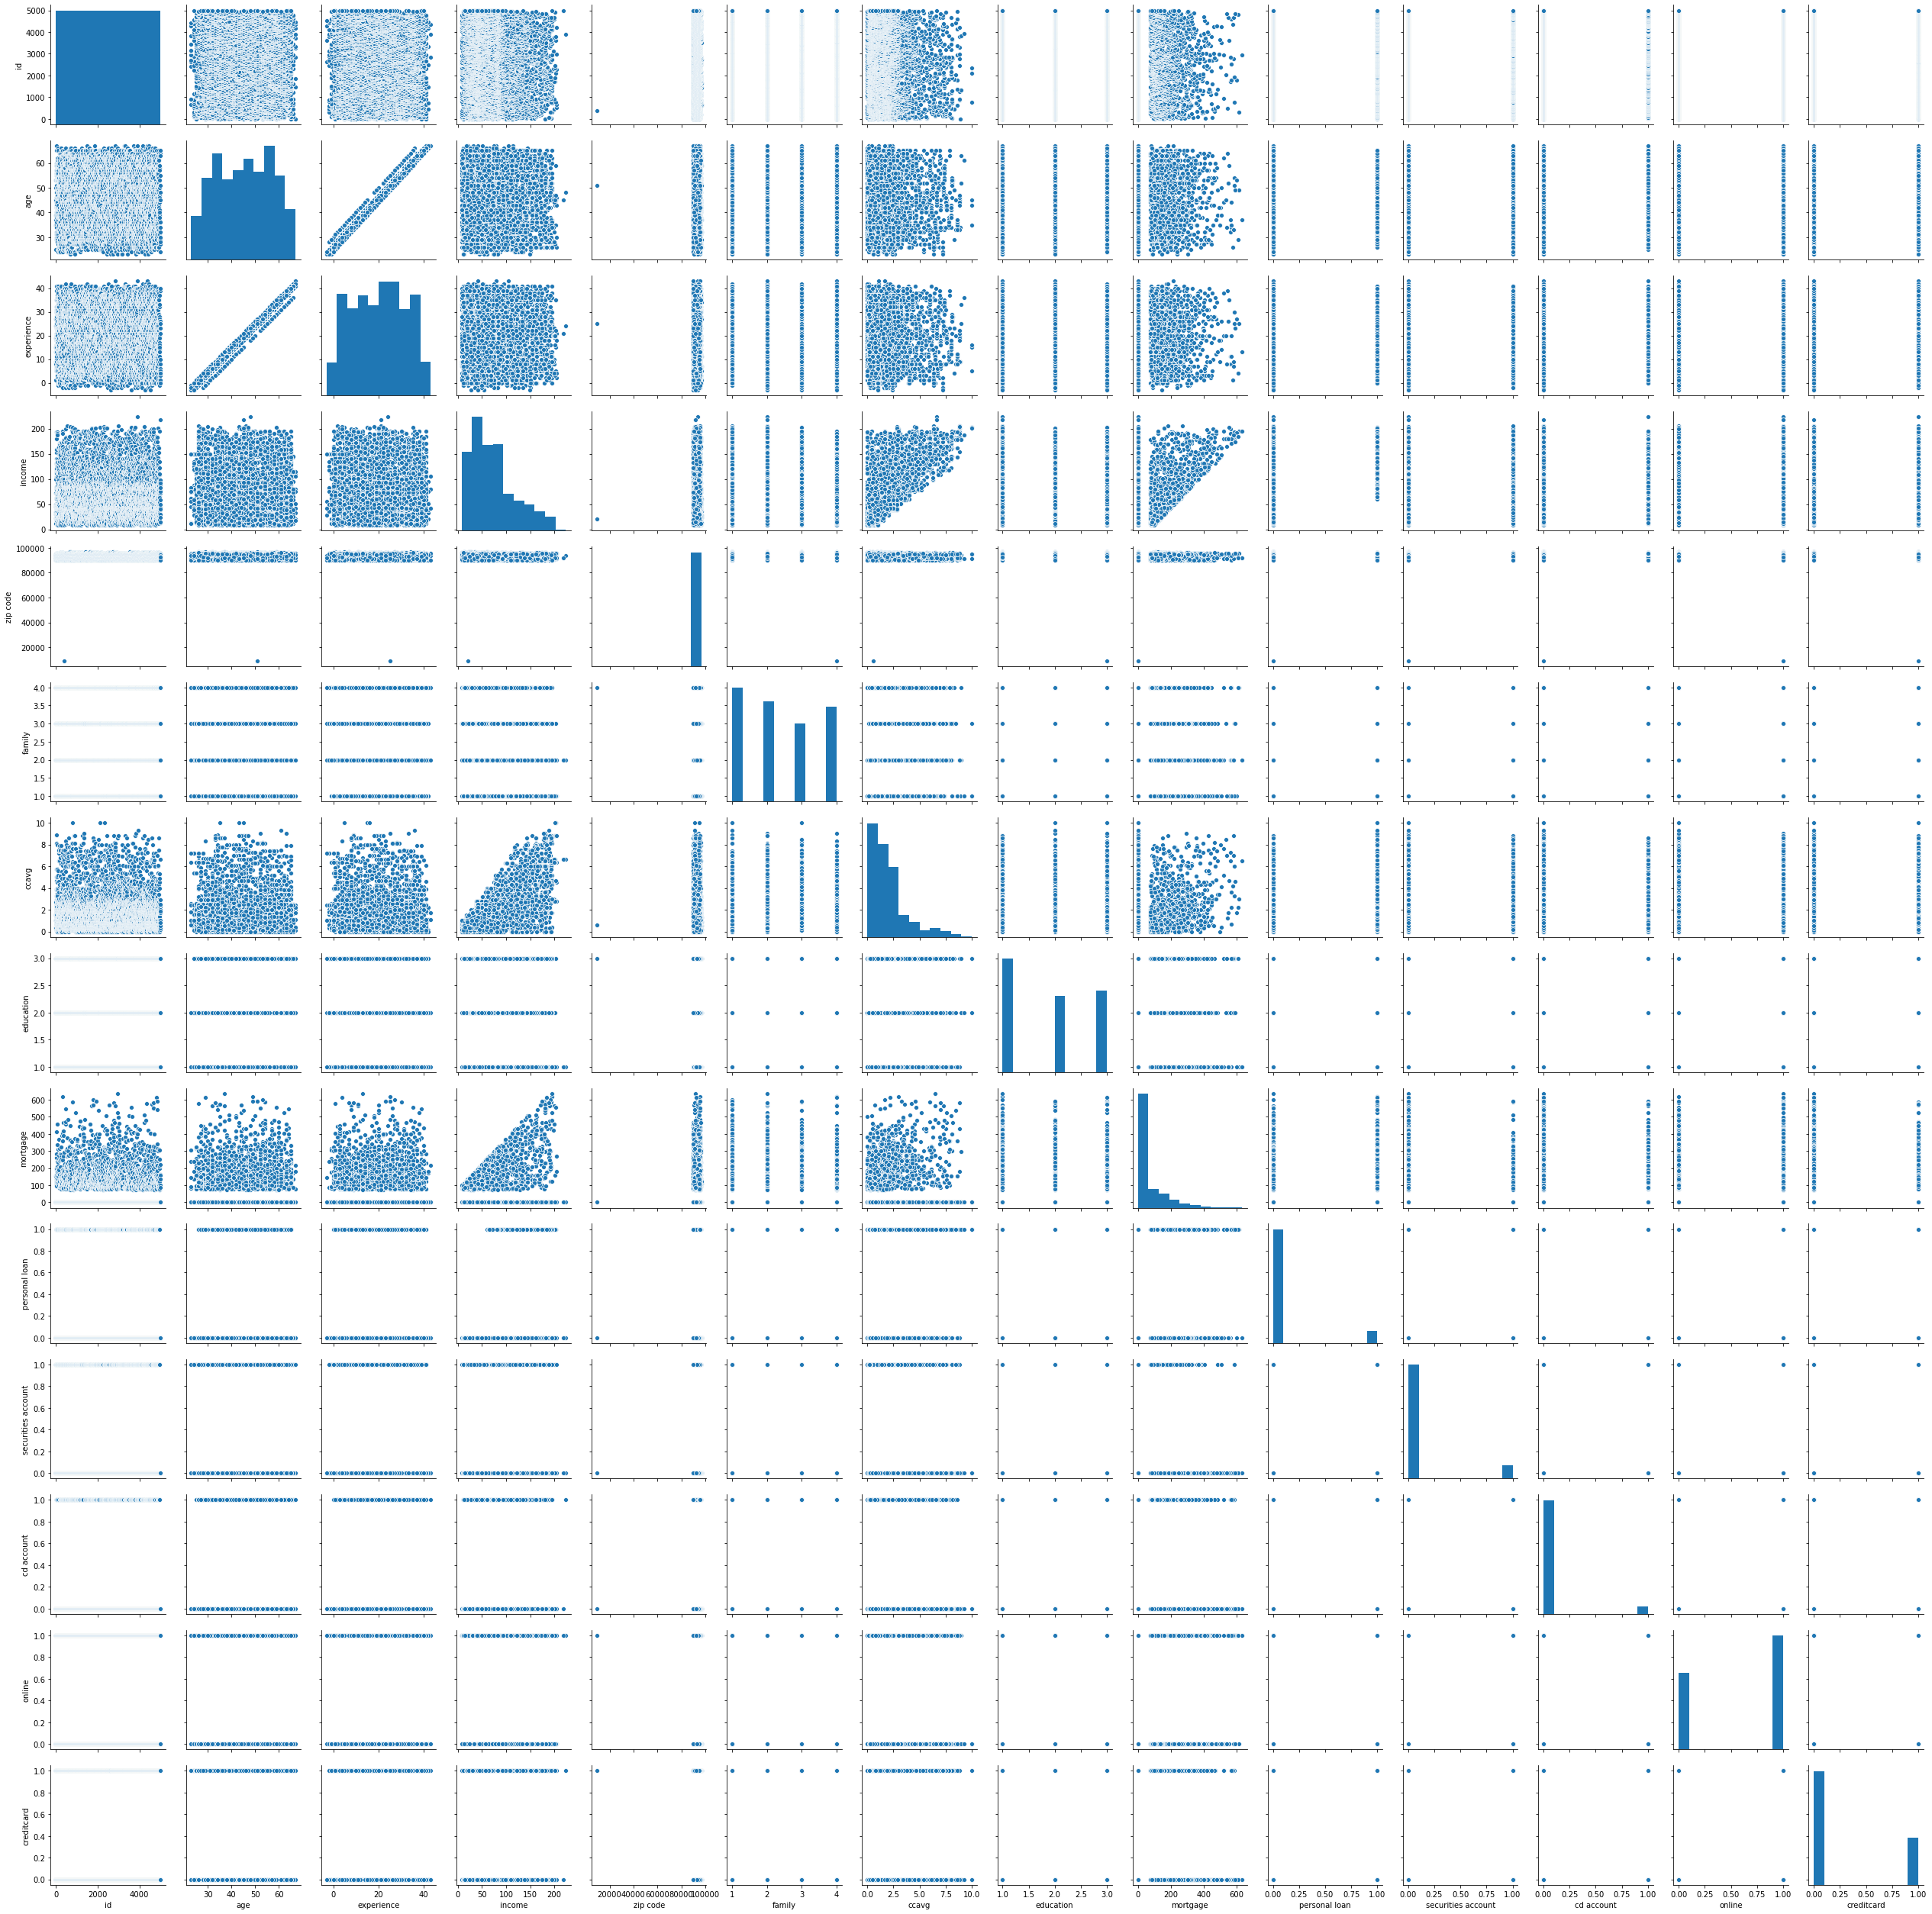

In [28]:
# Understanding the correlaion among different features
sns.pairplot(loan)

In [77]:
# note  : expreience can't be negative so we'll fix this problem
#based up on factors such as education and age
loan[loan.experience<0]

,age,experience,income,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [27]:
posexp = loan.loc[loan.experience >0]
negexp = loan[loan.experience<0].index

In [28]:
for val in negexp:
    age = loan.loc[val,"age"]
    edu = loan.loc[val,"education"]
    med = posexp[(posexp.age ==age)|(posexp.education==edu)]
    mid = med["experience"].median()
    loan.loc[val,"experience"] = mid


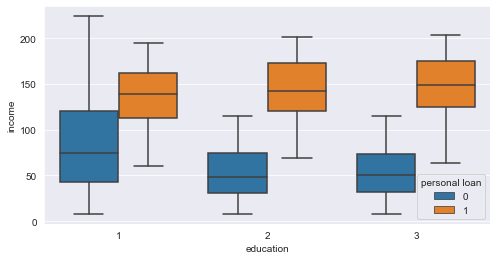

In [6]:
# Effect of income and education on personal loans
# note : people with  level 1 education tend to have more income
plt.rcParams['figure.figsize'] = (8,4)
sns.boxplot(x ='education',y = 'income' ,data = loan ,hue = 'personal loan' )

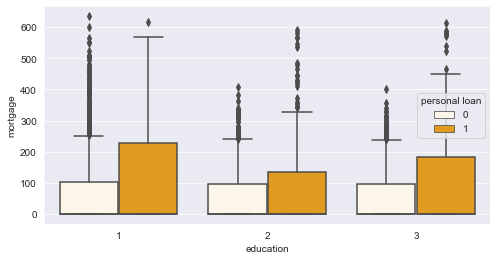

In [8]:
plt.rcParams['figure.figsize'] = (8,4)
sns.boxplot(x="education",y = "mortgage",hue = "personal loan",data = loan,color = "orange")

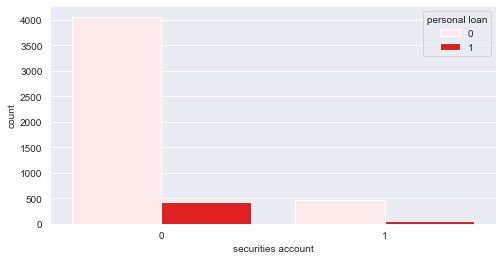

In [78]:
# people with no personal loan tend to have more security a/c
plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(x="securities account",hue = "personal loan",data = loan,color = "red")

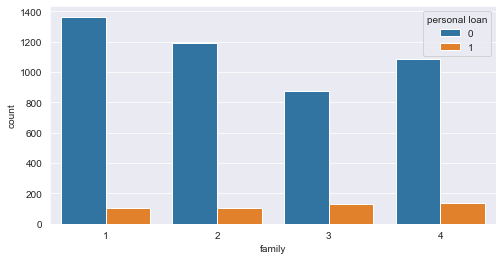

In [10]:

plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(x="family",hue = "personal loan",data = loan)

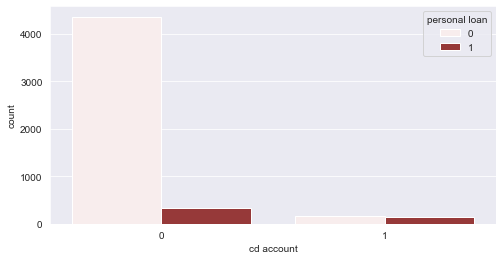

In [11]:
# people with no personal loan tend to have more cd a/c
plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(x="cd account",hue = "personal loan",data = loan,color = "brown")

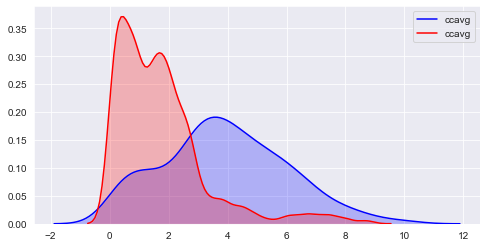

In [12]:
# people with  personal loan tend to use thier credit card more than people with no personal loan.
plt.rcParams['figure.figsize'] = (8,4)
sns.kdeplot(loan[loan["personal loan"]==1]["ccavg"],color = 'b',shade=True)
sns.kdeplot(loan[loan["personal loan"]==0]["ccavg"],color = "r",shade=True)
#loan.ccavg.unique()

In [13]:
loan['education'].value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [14]:
loan['experience'].max()

43.0

Text(0, 0.5, 'experience in years')

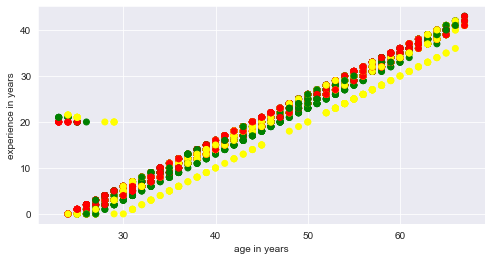

In [20]:
fig,a = plt.subplots()
colr  = {1:"red",2:'green',3:'yellow'}
a.scatter(loan['age'],loan['experience'],c = loan['education'].apply(lambda x :colr[x]))
plt.xlabel('age in years')
plt.ylabel('experience in years')

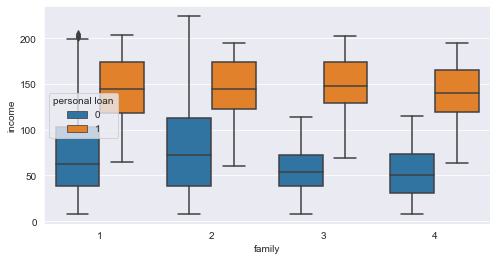

In [16]:
sns.boxplot(x = "family",y = "income",data = loan,hue = "personal loan")

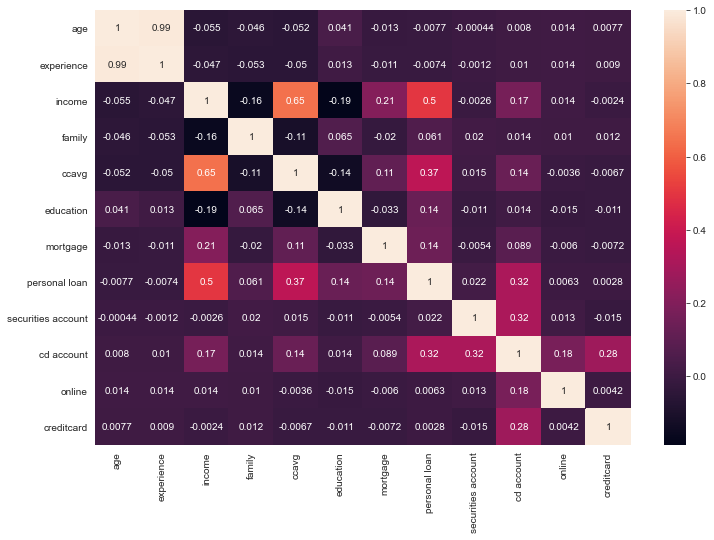

In [26]:
# insight : "highly correlation between experience v/s age"
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(loan.corr(),annot = True)

In [27]:
loan.corr()["personal loan"]

age                  -0.007726
experience           -0.007413
income                0.502462
family                0.061367
ccavg                 0.366889
education             0.136722
mortgage              0.142095
personal loan         1.000000
securities account    0.021954
cd account            0.316355
online                0.006278
creditcard            0.002802
Name: personal loan, dtype: float64

Targer Percentage value
 0    90.4
1     9.6
Name: personal loan, dtype: float64


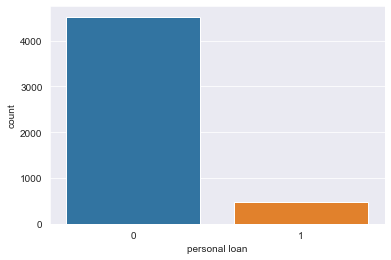

In [13]:
# Data is highly imbalanced (we need to fix that problem)
print("Targer Percentage value\n",loan["personal loan"].value_counts()/len(loan)*100)
sns.countplot(loan["personal loan"])
plt.show()

# Model Building

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [37]:
loan.head()

,age,experience,income,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [81]:
x = loan.drop(["personal loan"],axis = 1)
y = loan["personal loan"]
print("Target Label Percentage \n ")
loan["personal loan"].value_counts()/len(loan)*100

Target Label Percentage 
 


0    90.4
1     9.6
Name: personal loan, dtype: float64

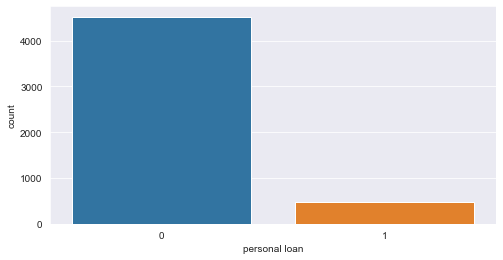

In [82]:
# Without Handling Imbalanced data

sns.countplot(y)

In [83]:
clf = LogisticRegression()
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 1)
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)

In [84]:
# Note : we have poor recall f1-score value even though we have high accuracy value it because imbalanced data proble
print("Without Handling Imbalanced Data : \n")
print(classification_report(ytest,ypred))
print("____"*23)
print(confusion_matrix(ytest,ypred))

Without Handling Imbalanced Data : 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.82      0.54      0.65       149

    accuracy                           0.94      1500
   macro avg       0.89      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500

____________________________________________________________________________________________
[[1334   17]
 [  69   80]]


In [85]:
# Handling imbalanced dataset problem using Smote
# even smote also not performed well ,see the recall,precision, recall score's
from imblearn.over_sampling import SMOTE
x = loan.drop(["personal loan"],axis = 1)
y = loan["personal loan"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 1)
sm = SMOTE(sampling_strategy = 1,random_state = 33,n_jobs  = -1)
xtrain,ytrain = sm.fit_sample(xtrain,ytrain)
print("Using SMOTE Technique for handling imbalanced Data : \n")
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print(classification_report(ytest,ypred))

Using SMOTE Technique for handling imbalanced Data : 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1351
           1       0.43      0.83      0.57       149

    accuracy                           0.88      1500
   macro avg       0.71      0.85      0.75      1500
weighted avg       0.92      0.88      0.89      1500



In [86]:
result = pd.DataFrame({"Algorithms" :["LogReg","LogReg","DecisionTree","DecisionTree"],
                      "Techniques"  :["UnderSample","Oversample","UnderSample","Oversample"],
                       "Accuracy"   :[0,0,0,0],
                       "Precision"  :[0,0,0,0],
                       "recall"     :[0,0,0,0],
                       "f1-score"   :[0,0,0,0] 
                       
                      }
                     
                     )
print("empty dataframe")
result

empty dataframe


,Algorithms,Techniques,Accuracy,Precision,recall,f1-score
0,LogReg,UnderSample,0,0,0,0
1,LogReg,Oversample,0,0,0,0
2,DecisionTree,UnderSample,0,0,0,0
3,DecisionTree,Oversample,0,0,0,0


In [91]:
lcnt = 0

dcnt = 2

In [92]:
for i in range(2):
    x = loan.drop(["personal loan"],axis = 1).copy()
    y = loan["personal loan"].copy()
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state  = 33)
    if(i==0):
        # undersampling
        
        temp_df = pd.concat([xtrain,ytrain],axis = 1)
        loan_1 = temp_df[temp_df["personal loan"]==1]
        loan_0 = temp_df[temp_df["personal loan"]==0].sample(len(loan_1))
        df = pd.concat([loan_1,loan_0],axis = 0)
        xtrain = df.drop(["personal loan"],axis = 1)
        ytrain = df["personal loan"]
        
        
    elif(i==1):
        
        # oversampling
        
        temp_df = pd.concat([xtrain,ytrain],axis = 1)
        loan_0 = temp_df[temp_df["personal loan"]==0]
        loan_1 = temp_df[temp_df["personal loan"]==1].sample(len(loan_0),replace = True)
        df = pd.concat([loan_1,loan_0],axis = 0)
        xtrain = df.drop(["personal loan"],axis = 1)
        ytrain = df["personal loan"]
        
    for j in range(2):
        if(j==0):
            clf = LogisticRegression()
            cnt = lcnt
            lcnt = lcnt+1
        else:
            clf = DecisionTreeClassifier()
            cnt = dcnt
            dcnt = dcnt+1
        clf.fit(xtrain,ytrain)
        ypred = clf.predict(xtest)
        
        result.iloc[cnt,2]  = round(100*accuracy_score(ytest,ypred),2)
        result.iloc[cnt,3]  = round(100*precision_score(ytest,ypred),2)
        result.iloc[cnt,4]  = round(100*recall_score(ytest,ypred),2)
        result.iloc[cnt,5]  = round(100*f1_score(ytest,ypred),2)

In [89]:
result

,Algorithms,Techniques,Accuracy,Precision,recall,f1-score
0,LogReg,UnderSample,88.33,47.49,88.75,61.87
1,LogReg,Oversample,89.20,49.66,90.00,64.00
2,DecisionTree,UnderSample,95.67,73.87,91.88,81.89
3,DecisionTree,Oversample,97.93,94.48,85.62,89.84


In [93]:
# Decisiontree  with Oversample technique out preforemd than other techniques . 